In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

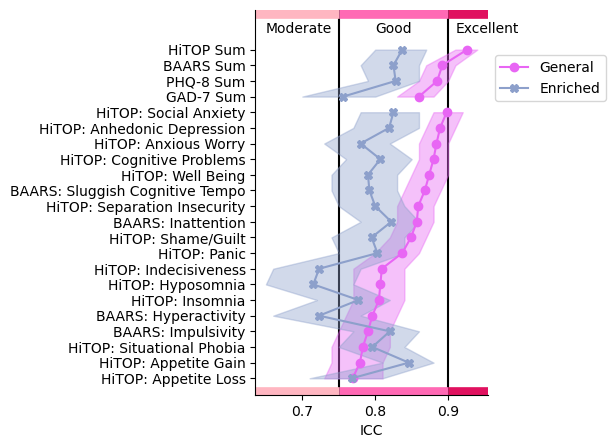

In [2]:
measure_repl = {
    'hitop_sum':'HiTOP Sum',
    'baars_sum': 'BAARS Sum',
    'phq_sum': 'PHQ-8 Sum',
    'gad_sum': 'GAD-7 Sum',
    'baars_inattention_sum': 'BAARS: Inattention',
    'baars_hyperactivity_sum': 'BAARS: Hyperactivity',
    'baars_impulsivity_sum': 'BAARS: Impulsivity',
    'baars_sct_sum': 'BAARS: Sluggish Cognitive Tempo',
    'hitop_anhedonic_depression': 'HiTOP: Anhedonic Depression',
    'hitop_anxious_worry': 'HiTOP: Anxious Worry',
    'hitop_appetite_gain': 'HiTOP: Appetite Gain',
    'hitop_appetite_loss': 'HiTOP: Appetite Loss',
    'hitop_cognitive_problems': 'HiTOP: Cognitive Problems',
    'hitop_hyposomnia': 'HiTOP: Hyposomnia',
    'hitop_indecisiveness': 'HiTOP: Indecisiveness', 
    'hitop_insomnia': 'HiTOP: Insomnia', 
    'hitop_panic': 'HiTOP: Panic',
    'hitop_separation_insecurity': 'HiTOP: Separation Insecurity',
    'hitop_shame_guilt': 'HiTOP: Shame/Guilt',
    'hitop_situational_phobia': 'HiTOP: Situational Phobia', 
    'hitop_social_anxiety': 'HiTOP: Social Anxiety',
    'hitop_well_being': 'HiTOP: Well Being'
}

# Load and munge General data
gdat = pd.read_csv('../results/ICC_general_removedGRIDchecks.csv')
gdat['sample'] = 'General'

gdat['l95'] = gdat['CI95%'].str.split(' ').str[0].str.strip('[').astype(float)
gdat['u95'] = gdat['CI95%'].str.split(' ').str[1].str.strip(']')
gdat.loc[gdat.u95 == '', 'u95'] = gdat.loc[gdat.u95 == '', 'CI95%'].str.split(' ').str[-1].str.strip(']')
gdat['u95'] = gdat.u95.astype(float)
gdat['Measure'] = gdat.Measure.replace(measure_repl)
total_measures = ['HiTOP Sum', 'BAARS Sum', 'PHQ-8 Sum', 'GAD-7 Sum']
gdat_tot = gdat.loc[gdat.Measure.isin(total_measures)].copy().sort_values('ICC', ascending=False).reset_index(drop=True)
gdat_tot['Total'] = True
gdat_other = gdat.loc[~gdat.Measure.isin(total_measures)].copy().sort_values('ICC', ascending=False).reset_index(drop=True)
gdat_other['Total'] = False

gdat = pd.concat([gdat_tot, gdat_other]).reset_index(drop=True)
gdat['ypos'] = len(gdat) - gdat.index.values

# load and munge enriched data
edat = pd.read_csv('../results/ICC_highrisk_removedGRIDchecks.csv')
edat['sample'] = 'Enriched'

edat['l95'] = edat['CI95%'].str.split(' ').str[0].str.strip('[').astype(float)
edat['u95'] = edat['CI95%'].str.split(' ').str[1].str.strip(']')
edat.loc[edat.u95 == '', 'u95'] = edat.loc[edat.u95 == '', 'CI95%'].str.split(' ').str[-1].str.strip(']')
edat['u95'] = edat.u95.astype(float)
edat['Measure'] = edat.Measure.replace(measure_repl)
total_measures = ['HiTOP Sum', 'BAARS Sum', 'PHQ-8 Sum', 'GAD-7 Sum']
edat_tot = edat.loc[edat.Measure.isin(total_measures)].copy().sort_values('ICC', ascending=False).reset_index(drop=True)
edat_tot['Total'] = True
edat_other = edat.loc[~edat.Measure.isin(total_measures)].copy().sort_values('ICC', ascending=False).reset_index(drop=True)
edat_other['Total'] = False

edat = pd.concat([edat_tot, edat_other]).reset_index(drop=True)
edat = edat.merge(gdat.loc[:, ['Measure', 'ypos']], how='left')
edat = edat.sort_values('ypos')

general_line_color = sns.color_palette('husl')[5]
enriched_line_color = sns.color_palette('Set2')[2]

# draw Plot
fig, ax = plt.subplots(1, figsize=(3,5))
# plot ICC Scale sums for general sample
ax.plot(gdat.query('Total').ICC, gdat.query('Total').ypos, color=general_line_color, label='General', marker='o')
ax.set_yticks(gdat.ypos)
ax.set_yticklabels(gdat.Measure)
# plot error fill between for scale sums for general sample
ax.fill_betweenx(gdat.query('Total').ypos, gdat.query('Total').l95, gdat.query('Total').u95, color=general_line_color, alpha=0.4)

# plot all others for general sample
ax.plot(gdat.query('not Total').ICC, gdat.query('not Total').ypos, color=general_line_color, marker='o')
ax.set_yticks(gdat.ypos)
ax.set_yticklabels(gdat.Measure)
# plot error fill between for other scales for general sample
ax.fill_betweenx(gdat.query('not Total').ypos, gdat.query('not Total').l95, gdat.query('not Total').u95, color=general_line_color, alpha=0.4)


# plot ICC Scale sums for general sample
ax.plot(edat.query('Total').ICC, edat.query('Total').ypos, color=enriched_line_color, label='Enriched', marker='X')
ax.set_yticks(edat.ypos)
ax.set_yticklabels(edat.Measure)
# plot error fill between for scale sums for general sample
ax.fill_betweenx(edat.query('Total').ypos, edat.query('Total').l95, edat.query('Total').u95, color=enriched_line_color, alpha=0.4)

# plot all others for general sample
ax.plot(edat.query('not Total').ICC, edat.query('not Total').ypos, color=enriched_line_color, marker='X')
ax.set_yticks(edat.ypos)
ax.set_yticklabels(edat.Measure)
# plot error fill between for other scales for general sample
ax.fill_betweenx(edat.query('not Total').ypos, edat.query('not Total').l95, edat.query('not Total').u95, color=enriched_line_color, alpha=0.4)

ax.set_xlabel('ICC')

# add indicators for moderate and good ICC
yll, yul = ax.get_ylim()
yul = yul + 1.5
xll, xul = ax.get_xlim()
ax.hlines([yll, yul], [xll, xll], [0.75,0.75], color='#FFB6C1', lw=12)
ax.hlines([yll, yul], [0.75, 0.75], [0.9,0.9], color='#FF69B4', lw=12)
ax.hlines([yll, yul], [0.9, 0.9], [xul,xul], color='#E0115F', lw=12)
ax.vlines([0.75, 0.9],[yll, yll], [yul, yul], color='black', zorder=-1)
# add annotations for ICC ranges
ax.text(0.65, yul-1.5, 'Moderate')
ax.text(0.8, yul-1.5, 'Good')
ax.text(0.91, yul-1.5, 'Excellent')

ax.set_ylim((yll, yul))
ax.set_xlim((xll, xul))

ax.legend(loc='upper left', bbox_to_anchor=(1,0.9))
sns.despine(fig)